Datasets:

- https://github.com/ygraham/eacl2017  spanish - english dataset with human assessment


## Metrics Shared Task on newstest 2015 data

In [15]:
import pathlib
import os
import pickle
import string

import pandas as pd
import numpy as np
import torch

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
dler = nltk.downloader.Downloader()
dler._update_index()
dler.download('omw-1.4')
# dler.download('all')

[nltk_data] Downloading package punkt to /home/ira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ira/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [49]:
# Path to original data
original_wmt_folder = os.path.join(os.pardir, 'data', 'wmt15', 'de-en')

orign_mt_txt_path = os.path.join(original_wmt_folder, 'newstest2015.mt-system.de-en')
orign_ref_txt_path = os.path.join(original_wmt_folder, 'newstest2015.reference.de-en')
orign_srs_path = os.path.join(original_wmt_folder, 'newstest2015.source.de-en')
human_score_path = os.path.join(original_wmt_folder, 'newstest2015.human.de-en')
bleu_score_path = os.path.join(original_wmt_folder, 'newstest2015.sbleumoses.de-en')

In [19]:
metric_scores_folder = ''

In [24]:
# Read text data: reference translation, MT-output, source sentence
with open(orign_ref_txt_path) as f:
    ref_snts = f.readlines()
    ref_snts = [s[:-1] for s in ref_snts] # remove the `end of line` character

with open(orign_mt_txt_path) as f:
    mt_snts = f.readlines()
    mt_snts = [s[:-1] for s in mt_snts]

with open(orign_srs_path) as f:
    src_snts = f.readlines()
    src_snts = [s[:-1] for s in src_snts]

len(ref_snts), len(src_snts), len(mt_snts)

(500, 500, 500)

In [21]:
human_score = pd.read_csv(human_score_path, names=['wmt_human_score'])
metric_scores = pd.DataFrame(data={'wmt_human_score': human_score['wmt_human_score']})

In [ ]:
def get_data_paths(preproc_level):
    if preproc_level == 'no':
        preproc_folder = 'raw_data'
    elif preproc_level == 'custom': # to lowercase + separate punctuation and special symbols
        preproc_folder = 'custom_preproc_data'
    elif preproc_level == 'custom_lowercase': # to lowercase + separate punctuation and special symbols
        preproc_folder = 'custom_lowercase_data'
    elif preproc_level == 'no_punct': # custom + no_punct
        preproc_folder = 'no_punct_data'    
    elif preproc_level == 'to_long_form': # custom + no_punct
        preproc_folder = 'long_form_data'    
    elif preproc_level == 'total': # custom + no_punct
        preproc_folder = 'total_preproc_data'        

    wmt_data_folder = os.path.join(os.pardir, 'data', 'wmt15', preproc_folder)
    
    mt_txt_path = os.path.join(wmt_data_folder, 'mt.txt')
    ref_txt_path = os.path.join(wmt_data_folder, 'reference.txt')
    srs_txt_path = os.path.join(wmt_data_folder, 'source.txt')
    
    return mt_txt_path, ref_txt_path, srs_txt_path

## Preprocess WMT data 

In [16]:
import utils.text_preprocessing as utp

### Prepare data for YiSi
There was a need to preprocess yisi so we applied `preprocessing_func_for_yisi` to data that were fed into yisi function

In [20]:
new_ref_snts = utp.preprocessing_func_for_yisi(ref_snts)
new_hyp_snts = utp.preprocessing_func_for_yisi(mt_snts)

In [21]:
wmt_yisi_folder = os.path.join(os.pardir, 'data', 'wmt15', 'preproc_for_yisi')

ref_txt_path = os.path.join(original_wmt_folder, 'preprocessed_ref_wmt15.txt')
mt_txt_path = os.path.join(original_wmt_folder, 'preprocessed_hyp_wmt15.txt')

with open(ref_txt_path, 'w') as f:
    f.write('\n'.join(new_ref_snts))
with open(mt_txt_path, 'w') as f:
    f.write('\n'.join(new_hyp_snts))

### 0. No preprocessing

In [30]:
preproc_level = 'no'
mt_txt_path, ref_txt_path, srs_txt_path = get_data_paths(preproc_level)

with open(ref_txt_path, 'w') as f:
    f.write('\n'.join(ref_snts))
with open(mt_txt_path, 'w') as f:
    f.write('\n'.join(mt_snts))
with open(srs_txt_path, 'w') as f:
    f.write('\n'.join(src_snts))

### 1. Apply custom preprocessing
i.e. separate punctuation and special symbols

In [45]:
# custom_preprocess parameters: (sent, lowercase, additional_preproc, long_form, remove_punct)
ref_preproc = [utp.custom_preprocess(s, False, True, False, False) for s in ref_snts]
mt_preproc = [utp.custom_preprocess(s, False, True, False, False) for s in mt_snts]
src_preproc = [utp.custom_preprocess(s, False, True, False, False) for s in src_snts]

In [46]:
preproc_level = 'custom'
mt_txt_path, ref_txt_path, srs_txt_path = get_data_paths(preproc_level)

with open(ref_txt_path, 'w') as f:
    f.write('\n'.join(ref_preproc))
with open(mt_txt_path, 'w') as f:
    f.write('\n'.join(mt_preproc))
with open(srs_txt_path, 'w') as f:
    f.write('\n'.join(src_preproc))

### 1.* Apply custom preprocessing with lowercase
i.e. bring to lowercase + separate punctuation and special symbols

In [50]:
# custom_preprocess parameters: (sent, lowercase, additional_preproc, long_form, remove_punct)
ref_preproc = [utp.custom_preprocess(s, True, True, False, False) for s in ref_snts]
mt_preproc = [utp.custom_preprocess(s, True, True, False, False) for s in mt_snts]
src_preproc = [utp.custom_preprocess(s, True, True, False, False) for s in src_snts]

In [51]:
preproc_level = 'custom_lowercase'
mt_txt_path, ref_txt_path, srs_txt_path = get_data_paths(preproc_level)

with open(ref_txt_path, 'w') as f:
    f.write('\n'.join(ref_preproc))
with open(mt_txt_path, 'w') as f:
    f.write('\n'.join(mt_preproc))
with open(srs_txt_path, 'w') as f:
    f.write('\n'.join(src_preproc))

### 2. (1*) + bring to long form

Bringing to long form is English-specific feature. Thus, we won't apply it source sentence

In [52]:
# custom_preprocess parameters: (sent, lowercase, additional_preproc, long_form, remove_punct)
ref_preproc = [utp.custom_preprocess(s, True, True, True, False) for s in ref_snts]
mt_preproc = [utp.custom_preprocess(s, True, True, True, False) for s in mt_snts]
src_preproc = [utp.custom_preprocess(s, True, True, False, False) for s in src_snts]

In [53]:
preproc_level = 'to_long_form'
mt_txt_path, ref_txt_path, srs_txt_path = get_data_paths(preproc_level)

with open(ref_txt_path, 'w') as f:
    f.write('\n'.join(ref_preproc))
with open(mt_txt_path, 'w') as f:
    f.write('\n'.join(mt_preproc))
with open(srs_txt_path, 'w') as f:
    f.write('\n'.join(src_preproc))

### 3. (1*) + remove punctuation

In [41]:
# custom_preprocess parameters: (sent, lowercase, additional_preproc, long_form, remove_punct)
ref_preproc = [utp.custom_preprocess(s, True, True, False, True) for s in ref_snts]
mt_preproc = [utp.custom_preprocess(s, True, True, False, True) for s in mt_snts]
src_preproc = [utp.custom_preprocess(s, True, True, False, True) for s in src_snts]

In [42]:
preproc_level = 'no_punct'
mt_txt_path, ref_txt_path, srs_txt_path = get_data_paths(preproc_level)

with open(ref_txt_path, 'w') as f:
    f.write('\n'.join(ref_preproc))
with open(mt_txt_path, 'w') as f:
    f.write('\n'.join(mt_preproc))
with open(srs_txt_path, 'w') as f:
    f.write('\n'.join(src_preproc))

### 4. (1*) + bring to long form + remove punctuation

In [43]:
# custom_preprocess parameters: (sent, lowercase, additional_preproc, long_form, remove_punct)
ref_preproc = [utp.custom_preprocess(s, True, True, True, True) for s in ref_snts]
mt_preproc = [utp.custom_preprocess(s, True, True, True, True) for s in mt_snts]
src_preproc = [utp.custom_preprocess(s, True, True, True, True) for s in src_snts]

In [44]:
preproc_level = 'total'
mt_txt_path, ref_txt_path, srs_txt_path = get_data_paths(preproc_level)

with open(ref_txt_path, 'w') as f:
    f.write('\n'.join(ref_preproc))
with open(mt_txt_path, 'w') as f:
    f.write('\n'.join(mt_preproc))
with open(srs_txt_path, 'w') as f:
    f.write('\n'.join(src_preproc))

### Tokenize

In [17]:
ref_tokens = [rmv_punkt(s) for s in ref_snts]
ref_tokens = [word_tokenize(s) for s in ref_tokens]

In [18]:
mt_tokens = [rmv_punkt(s) for s in mt_snts]
mt_tokens = [word_tokenize(s) for s in mt_tokens]

In [16]:
src_tokens = [rmv_punkt(s) for s in src_snts]
src_tokens = [word_tokenize(s) for s in src_tokens]

### TODO: check different smoothing functions for BLUE score

Smmothing methods
- method 4 is used in case of short sentences; explanation:     
    Shorter translations may have **inflated precision** values due to having smaller denominators;    
    therefore, we give them proportionally smaller **smoothed counts**. 
- method 5: The matched counts for similar values of n should be similar.    
    To a calculate the n-gram matched count, it averages the n−1, n and n+1 gram matched counts.
- method 7 interpolates method 4 and method 5

In [26]:
smoother = bleu_score.SmoothingFunction()
bleu_smooth7 = bleu_score.sentence_bleu([ref_splitted[0]], mt_splitted[0], smoothing_function=smoother.method7),
bleu_smooth4 = bleu_score.sentence_bleu([ref_splitted[0]], mt_splitted[0], smoothing_function=smoother.method4) 
bleu_smooth2 = bleu_score.sentence_bleu([ref_splitted[0]], mt_splitted[0], smoothing_function=smoother.method2) 
bleu_smooth2, bleu_smooth4, bleu_smooth7

(0.5149417859767794, 0.4792365811426396, (0.5576593569214733,))

### Some trials to implement GTM score

In [ ]:
def calculate_lcs(r, h):
    match_len = []
    return match_len

def gtm(r, h):
    '''
        r - list of tokens, e.g. ['I', 'know']
        h - list of tokens, e.g. ['I', 'do', 'know']
    '''
    matches = calculate_lcs(r, h)
    match_size = sum(matches)
    prec = match_size / len(h)
    recall = match_size / len(r)
    f_score = 2 * (prec * recall) / (prec + recall)

In [115]:
# computes positions in X string... to check indices of substr in Y - change X and Y order 

def LCS(X, Y, m, n):
 
    maxLength = 0           # stores the max length of LCS
    endingIndex = m         # stores the ending index of LCS in `X`
 
    # `lookup[i][j]` stores the length of LCS of substring `X[0…i-1]` and `Y[0…j-1]`
    lookup = [[0 for x in range(n + 1)] for y in range(m + 1)]
 
    # fill the lookup table in a bottom-up manner
    for i in range(1, m + 1):
        for j in range(1, n + 1):
 
            # if the current character of `X` and `Y` matches
            if X[i - 1] == Y[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + 1
 
                # update the maximum length and ending index
                if lookup[i][j] > maxLength:
                    maxLength = lookup[i][j]
                    endingIndex = i
 
    # return longest common substring having length `maxLength`
    startIndex = endingIndex - maxLength
    return startIndex, endingIndex-1, maxLength, X[startIndex: endingIndex]

In [124]:
# read precomputed scores from gtm java package
gtm_path = 'gtm_report.txt'
with open(gtm_path, 'r') as f:
    gtm_report = f.readlines()
gtm_scores = []
for l in gtm_report:
    if 'sampledoc' in l:
        scores = l[:-1].split(' ')
        if len(scores) == 3:
            score = float(scores[2])
            gtm_scores.append(score)
metric_scores['gtm'] = gtm_scores

---

## Experiments with TERp parameters

In [37]:
terp_scores = pd.read_csv("terpa.simple..seg.scr", sep='\t', header=None, names=['sys_id', 'col', 'doc_id', 'seg_id', 'terp','words_count'])
terp_scores = terp_scores[['terp','words_count']]
terp_scores['words_count'] = terp_scores['words_count'].apply(lambda x: int(x))
terp_scores

,terp,words_count
0,0.213555,17
1,0.300167,29
2,0.598036,23
3,0.563409,29
4,0.898603,21
...,...,...
495,0.735070,12
496,0.445292,27
497,0.837139,33
498,0.548616,38


In [39]:
# Processing of the 'terpa.simple.sum' file

# res = pd.read_csv("terpa.simple.sum", sep='|', skipinitialspace=True, 
#                   skiprows=[0,1,2,4], skipfooter=2) 
# res = res[res.columns[1:]]
# names_map = {name: name.replace(' ', '').replace('\t', '') for name in res.columns}
# res = res.rename(columns=names_map)

# for name in res.columns[:-3]:
#     res[name] = res[name].apply(lambda x: int(x))

# res['NumWd'] = res['NumWd'].apply(lambda x: int(x))
# res['NumEr'] = res['NumEr'].apply(lambda x: float(x))
# res['TERp'] = res['TERp'].apply(lambda x: float(x))

# res.to_csv("terp_edits.csv", index=False)

In [40]:
# can be used as features for other trained metric

terp_summary_df = pd.read_csv("terp_edits.csv")
terp_summary_df

,Ins,Del,Sub,Stem,Syn,Phrase,Shft,WdSh,NumEr,NumWd,TERp
0,3,2,0,0,0,0,0,0,3.630,17,21.355
1,2,1,4,0,0,2,0,0,8.705,29,30.017
2,3,5,3,0,0,1,1,2,13.755,23,59.804
3,5,2,7,1,1,1,0,0,16.339,29,56.341
4,5,5,6,0,0,1,1,1,18.871,21,89.860
...,...,...,...,...,...,...,...,...,...,...,...
495,0,4,2,0,1,0,0,0,8.821,12,73.507
496,8,3,2,0,0,5,1,1,12.023,27,44.529
497,6,4,12,1,1,0,3,3,27.626,33,83.714
498,2,9,4,0,1,1,1,3,20.847,38,54.862


In [41]:
# Train simple Regression to learn edit costs for different types of edits, i.e. shifts, deletions, etc.

import numpy as np
from sklearn.linear_model import LinearRegression
X = terp_summary_df[['Ins','Del','Sub','Phrase','Shft','WdSh']].to_numpy()
y = 1 - metric_scores['wmt_human_score']
model = LinearRegression().fit(X, y)
model.coef_

array([ 0.01823973,  0.03674374,  0.04361323, -0.04881811,  0.00139881,
        0.01071843])

## MTEQA - MT eval metric with QA

In [70]:
import pandas as pd
mteqa_score_path = 'mteqa_score_seg.tsv'
with open(mteqa_score_path, 'r') as f:
     mteqa_scores_orign = f.readlines()

mteqa_scores = [score[:-1].split('\t')[-4:] for score in mteqa_scores_orign]
mteqa_f1 = [float(scores[0]) for scores in mteqa_scores[1:]]
mteqa_em = [float(scores[1]) for scores in mteqa_scores[1:]]
mteqa_chrf = [float(scores[2]) for scores in mteqa_scores[1:]]
mteqa_bleu = [float(scores[3]) for scores in mteqa_scores[1:]]

metric_scores['mteqa_chrf'] = mteqa_chrf
metric_scores['mteqa_bleu'] = mteqa_bleu

In [71]:
import pickle
with open("mteqa_answers.pickle", 'rb') as f:
    mteqa_answers = pickle.load(f)
mteqa_answers

[[('Amazon', 'Amazon'),
  ('a popular alternative', 'used books'),
  ('Half.com', 'eBay Inc'),
  ('books', 'used books'),
  ('Chegg', 'half.com'),
  ("eBay Inc's", 'eBay Inc')],
 [('pipe laggers', 'plumbers'),
  ('people', 'people in certain industries'),
  ('example', 'construction workers'),
  ('carpenters', 'construction workers'),
  ('builders',
   'plumbers, construction workers, carpenters and shipyard workers'),
  ('shipyard workers', 'shipyard workers'),
  ('specific industries',
   'plumbers, construction workers, carpenters and shipyard workers')],
 [('a pelican crossing', 'on a Fußgängerüberweg in Fife'),
  ('old girl', '78'),
  ('78', '78-years'),
  ('year', '78-year-old'),
  ('three-year-old', 'three-year-old girl'),
  ('trial', 'Überfahrens 78-jähriger'),
  ('old man', 'A man'),
  ('Fife', 'Fife'),
  ('three', 'three-year-old'),
  ('78-year-old', '78-years')],
 [('Cyclists', 'Cyclists, joggers and walkers'),
  ('part yesterday', 'the 8th cycle'),
  ('support', 'supported'

In [72]:
mteqa_answers = [[(ans_pair[0].lower(), ans_pair[1].lower()) for ans_pair in i] for i in mteqa_answers]
mteqa_answers

[[('amazon', 'amazon'),
  ('a popular alternative', 'used books'),
  ('half.com', 'ebay inc'),
  ('books', 'used books'),
  ('chegg', 'half.com'),
  ("ebay inc's", 'ebay inc')],
 [('pipe laggers', 'plumbers'),
  ('people', 'people in certain industries'),
  ('example', 'construction workers'),
  ('carpenters', 'construction workers'),
  ('builders',
   'plumbers, construction workers, carpenters and shipyard workers'),
  ('shipyard workers', 'shipyard workers'),
  ('specific industries',
   'plumbers, construction workers, carpenters and shipyard workers')],
 [('a pelican crossing', 'on a fußgängerüberweg in fife'),
  ('old girl', '78'),
  ('78', '78-years'),
  ('year', '78-year-old'),
  ('three-year-old', 'three-year-old girl'),
  ('trial', 'überfahrens 78-jähriger'),
  ('old man', 'a man'),
  ('fife', 'fife'),
  ('three', 'three-year-old'),
  ('78-year-old', '78-years')],
 [('cyclists', 'cyclists, joggers and walkers'),
  ('part yesterday', 'the 8th cycle'),
  ('support', 'supported'

In [73]:
updated_mteqa_chrf = []
for k, ans_list in enumerate(mteqa_answers):
    selected_ans_scores = {}
    ref_sent = ref_snts[k].lower()
    ref_sent_tkns = [w.lower() for w in ref_tokens[k]]
    hyp_sent_tkns = [w.lower() for w in mt_tokens[k]]
    
    for i, (ref, hyp) in  enumerate(ans_list):
        s = sb_chrf.sentence_score(ref, [hyp]).score / 100
        if hyp in selected_ans_scores:
            old_score = selected_ans_scores[hyp]
            if old_score < s:
                selected_ans_scores[hyp] = s
        else:                
            # check context around the words in ref and hyp
            w1 = hyp.split(' ')[0].lower()
            w2 = hyp.split(' ')[-1].lower()
            ref_idx_w1 = -1
            if w1 in ref_sent_tkns:
                ref_idx_w1 = ref_sent_tkns.index(w1)
            ref_idx_w2 = -1
            if w2 in ref_sent_tkns:
                ref_idx_w2 = ref_sent_tkns.index(w2)
            lw = '.'
            if ref_idx_w1 > 0:
                lw = ref_sent_tkns[ref_idx_w1-1]
            rw = '.'
            if ref_idx_w2 < len(ref_sent_tkns)-1:
                rw = ref_sent_tkns[ref_idx_w2+1]

            hyp_idx_w1 = -1
            if w1 in hyp_sent_tkns:
                hyp_idx_w1 = hyp_sent_tkns.index(w1)
            hyp_idx_w2 = -1
            if w2 in hyp_sent_tkns:
                hyp_idx_w2 = hyp_sent_tkns.index(w2)
            h_lw = '.'
            if hyp_idx_w1 > 0:
                h_lw = hyp_sent_tkns[hyp_idx_w1-1]
            h_rw = '.'
            if hyp_idx_w2 < len(hyp_sent_tkns)-1:
                h_rw = hyp_sent_tkns[hyp_idx_w2+1]

            context_score = sb_chrf.sentence_score(lw + rw, [h_lw + h_rw]).score / 100
            selected_ans_scores[h_lw + h_rw] = context_score
            # end of checking context
            
            if hyp in ref_sent:
                selected_ans_scores[hyp] = 1
            else:
                selected_ans_scores[hyp] = s
    print(selected_ans_scores)
    scores = list(selected_ans_scores.values())
    avg_chrf_score = 0.5
    if len(scores) > 0:
        avg_chrf_score = sum(scores) / len(scores)
    updated_mteqa_chrf.append(avg_chrf_score)
    print(avg_chrf_score)
    print('\n')
updated_mteqa_chrf
metric_scores['updated_chrf_mteqa'] = updated_mteqa_chrf


{'andhalf': 0.1841269841269841, 'amazon': 1, 'for.': 1.0, 'used books': 1, 'comis': 0.12121212121212122, 'ebay inc': 1, '.besides': 1.0, 'half.com': 1}
0.7881673881673882


{'substanceconstruction': 0.022471910112359553, 'plumbers': 0.16604314861126843, 'onlyworked': 1.0, 'people in certain industries': 0.1814675596475343, 'plumberscarpenters': 0.01644736842105263, 'construction workers': 0.09938454201430748, '.carpenters': 0.05208333333333334, 'plumbers, construction workers, carpenters and shipyard workers': 0.06817769444330328, 'andcarpenters': 0.10634972976093725, 'shipyard workers': 1}
0.2712425286344097


{'girlin': 0.43997429305912605, 'on a fußgängerüberweg in fife': 0.07967099977043159, '.a': 1.0, '78': 1, '78-years': 0.7159815217449528, '78-year-old': 1, '.on': 1.0, 'three-year-old girl': 1, 'standsa': 0.08333333333333331, 'überfahrens 78-jähriger': 0.04363449691991786, '.stands': 0.1075268817204301, 'a man': 0.4227941176470588, 'inin': 0.29461279461279455, 'fife': 1, 'three-

{'.as': 0.0925925925925926, 'the plans in the face of the dispute in the union': 0.04634120056040522, '.the': 0.05208333333333334, 'the lefties': 1, 'as.': 0.15151515151515152, 'a failure': 1, '.in': 0.3142536475869809, 'the plans': 1, 'the dispute in the union': 0.09539820404363955, 'theas': 0.37736568986568986, 'union': 1}
0.46632271086343574


{'in.': 1.0, 'tents': 1, 'theplace': 0.04065040650406503, 'new countries': 0.10870627320695721, 'putnow': 0.06172839506172839, 'refugees': 1}
0.5351808457954584


{'forshould': 0.3416976027008577, 'blacks': 1, 'toand': 0.04, "campaign for women's suffrage": 0.08386082258013312, 'said.': 1.0, 'hattery': 1, 'towomens': 0.08771929824561403, "campaign for women's suffrage and the right to vote for": 0.06029161239995915}
0.45169616699082044


{'.is': 1.0, 'louisiana': 1, 'ofstates': 0.5557517320700496, '11': 1, 'enactedcourts': 0.0818252221407027, 'similar laws': 1, 'inand': 1.0, 'alabama': 1, 'andfor': 0.31249999999999994, 'mississippi': 1, 'lawsh

{'isjust': 1.0, 'not': 1}
1.0


{'.i': 1.0, 'once a year': 1, 'into': 0.20833333333333331, 'the gym': 1}
0.8020833333333334


{'a.': 0.16666666666666663, 'gate': 0.125, 'defenderlooked': 0.024875621890547265, 'maximilian karner': 1, 'is.': 0.06944444444444445, 'a gate': 0.17}
0.25933112216694304


{'..': 0.20833333333333337, 'south-east of england': 0.3104353414663445, 'thereturned': 0.16580952119512582, 'housing': 1, 'toin': 0.20833333333333331, 'normal levels': 1, 'mostof': 0.5622688535134266, 'prominent builders': 0.4704576061193708, '.pointed': 0.1388888888888889, 'one of the most prominent builders of london': 0.10700503067784811, '.of': 1.0, 'one': 1, 'ofpointed': 0.09375, 'london': 1}
0.5189487077519764


{'thethe': 0.17335660741368136, 'mediterranean sea': 0.8107459493109679, 'enterpriseresident': 0.14106753812636166, 'norwegian cruise': 1, '..': 0.15625, 'the caribbean': 1, 'practicescruise': 0.49325935041264396, '13': 1, '.the': 0.03787878787878788, 'the mediterranean sea': 0

In [11]:
with open("mteqa_generated_answers.pickle", 'rb') as f:
    mteqa_generated_answ_test = pickle.load(f)
mteqa_generated_answ_test

[[('John', 'John'), ('London', 'London')],
 [('this article', 'article')],
 [('this article', 'this article')],
 [('Words', 'hyp'), ('ref', 'hyp and ref'), ('hyp', 'hyp')],
 [('hyp', 'hyp'), ('Ref', 'Ref')],
 [],
 [('This spring', 'spring')]]

In [75]:
mteqa_test_df = pd.read_csv('mteqa_score_test.tsv', sep='\t')
mteqa_test_df

,REF,OUTPUT,F1,EM,chrf,bleu
0,John loves London.,John hates London.,1.000000,1.000000,100.000000,100.000000
1,"I never wrote this article, I just edited it.","It is not my article, I just edited it.",0.666667,0.000000,56.439784,36.787944
2,"I never wrote this article, I just edited it.","I never wrote this article, I never edited it.",1.000000,1.000000,100.000000,100.000000
3,Words are permuted in ref and hyp.,In hyp and ref are words permuted.,0.500000,0.333333,53.830645,42.505353
4,Ref and hyp are the same.,Ref and hyp are the same.,1.000000,1.000000,100.000000,100.000000
5,It was warm outside.,It was cold outside.,0.000000,0.000000,0.000000,0.000000
6,This spring is really warm.,This spring is really cold.,0.666667,0.000000,49.168108,36.787944


## RegEMT 

In [2]:
import pickle
with open("regemt_report_15.pickle", 'rb') as f:
    regemt_predictor_metrics = pickle.load(f)
regemt_predictor_metrics

{'human': [-0.0524933532539126,
  1.16917233769878,
  -0.413676354032134,
  0.167031498730923,
  0.46289273869537,
  -0.809342679575121,
  -0.026417463801632,
  0.420410097641024,
  -1.02006207458751,
  0.418323982531535,
  -0.122662158495722,
  -0.50574865452653,
  -0.200973027873168,
  0.892141225621965,
  -0.768481302866252,
  -0.418367515139728,
  -0.326040486328039,
  0.460151798231812,
  0.635943993936797,
  0.126346159204011,
  0.172449146851823,
  1.09531700028675,
  -0.42810052440641,
  -0.424887613616621,
  -0.144764373218382,
  -0.210733383607732,
  0.57102691038846,
  -0.821648992404251,
  0.164682392315432,
  -1.21606962044665,
  -0.832949941754411,
  0.666740988045865,
  0.169691471422385,
  -0.594246705862037,
  -0.576981187750168,
  0.0738141870629063,
  0.799093463258626,
  0.876777474480984,
  -0.0560478371765846,
  0.464631363029329,
  0.596303755796257,
  -0.634092281533245,
  0.478606317945255,
  -0.382516336582448,
  0.8493130032683075,
  -0.630440817527706,
  0.2

In [4]:
import pandas as pd
regemt_predictors_df = pd.DataFrame(regemt_predictor_metrics)
regemt_predictors_df

,human,Regression,Comet,Prism,BERTScore,WMD_contextual,WMD_decontextualized,WMD_decontextualized_tfidf,SCM_decontextualized,SCM_decontextualized_tfidf,SCM,SCM_tfidf,WMD,WMD_tfidf,BLEUrt,BLEU,METEOR,Compositionality,Regression_baseline
0,-0.052493,0.181906,0.413722,-2.091562,0.930001,0.321842,0.223394,1.470622,0.988924,0.876157,0.798006,0.511875,0.463209,2.624498,-0.049303,13.907243,0.577513,0.224738,0.018934
1,1.169172,1.119061,1.175942,-0.103947,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.991992,100.000000,0.996000,0.000000,0.146511
2,-0.413676,0.046721,-0.064795,-2.549097,0.923303,0.375806,0.231799,1.303775,1.000000,0.796662,0.642342,0.521626,0.592889,3.094655,0.006537,7.735985,0.428847,0.237677,0.030694
3,0.167031,-0.100390,0.317796,-1.501278,0.956367,0.328820,0.145980,0.833784,0.996162,0.871717,0.885474,0.866400,0.260068,1.225179,-0.310889,37.399784,0.628169,0.172475,0.096282
4,0.462893,0.366038,0.706125,-2.264277,0.930327,0.386376,0.253438,2.137708,0.946429,1.000000,0.732685,0.403435,0.548441,3.977846,0.003657,12.892788,0.418216,0.151634,-0.053616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,-0.309911,-0.273214,-0.110022,-1.539864,0.947760,0.309725,0.101460,0.573670,0.975041,0.909926,0.741498,0.742352,0.341645,1.787733,-0.333375,36.828145,0.571884,0.125000,-0.082448
102,-1.241190,-0.658000,-0.844502,-2.614780,0.886385,0.476761,0.245279,2.020197,0.893881,0.779849,0.681265,0.672365,0.412921,3.294927,-1.088398,18.362020,0.542355,0.206782,-0.003139
103,-0.800560,-0.190347,-0.082453,-2.160240,0.913976,0.400982,0.182039,1.376895,0.970313,0.774336,0.845000,0.434479,0.429406,2.874110,-0.510484,37.487664,0.599315,0.147746,-0.039741
104,-0.724949,-0.514776,-0.369796,-2.019747,0.900699,0.421082,0.232861,1.646970,0.967041,0.770328,0.728981,0.678899,0.428755,2.881199,-0.937439,26.801940,0.414943,0.163873,-0.194981


In [9]:
regemt_predictors_df['inverse_WMD'] = regemt_predictors_df['WMD'].apply(lambda s: 1 - s)

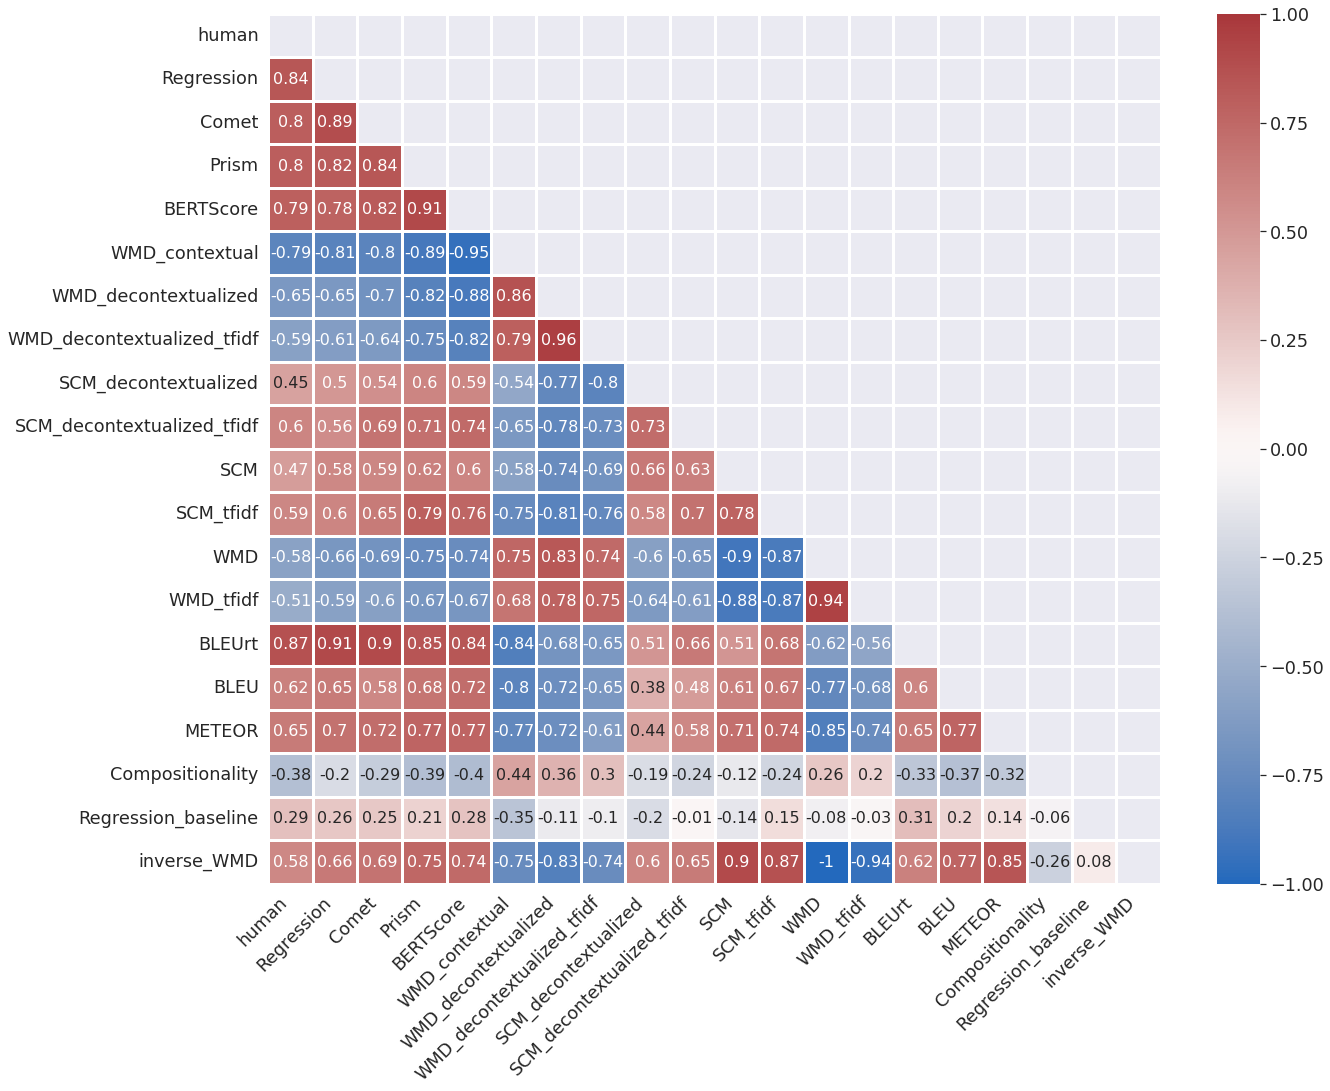

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20, 16)})
sns.set(font_scale=1.6)

matrix = regemt_predictors_df.corr(method='pearson').round(2)
# matrix = matrix[columns]
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig = sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, 
                  annot_kws={"size": 16}, linewidth=3)

fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')

print()
plt.show()

In [78]:
regemt_predictors_df.corr()

,human,Regression,Comet,Prism,BERTScore,WMD_contextual,WMD_decontextualized,WMD_decontextualized_tfidf,SCM_decontextualized,SCM_decontextualized_tfidf,SCM,SCM_tfidf,WMD,WMD_tfidf,BLEUrt,BLEU,METEOR,Compositionality,Regression_baseline
human,1.000000,0.835124,0.802209,0.795327,0.794307,-0.790775,-0.645478,-0.592267,0.453724,0.595455,0.469062,0.593305,-0.578338,-0.510724,0.867448,0.622625,0.647754,-0.376159,0.288796
Regression,0.835124,1.000000,0.889475,0.822779,0.783767,-0.807052,-0.653915,-0.606307,0.503883,0.564266,0.577270,0.600560,-0.663938,-0.590090,0.910511,0.648175,0.703327,-0.202752,0.261949
Comet,0.802209,0.889475,1.000000,0.835644,0.816707,-0.802112,-0.698471,-0.644105,0.538695,0.686507,0.587251,0.651147,-0.689619,-0.602242,0.901664,0.581003,0.717635,-0.293167,0.252532
Prism,0.795327,0.822779,0.835644,1.000000,0.907442,-0.885480,-0.816177,-0.752818,0.596935,0.714755,0.622158,0.788934,-0.746147,-0.670333,0.847155,0.683257,0.767728,-0.387039,0.212269
BERTScore,0.794307,0.783767,0.816707,0.907442,1.000000,-0.948250,-0.876519,-0.815616,0.586672,0.742159,0.599555,0.756936,-0.739513,-0.668174,0.835079,0.718852,0.767263,-0.396491,0.275951
WMD_contextual,-0.790775,-0.807052,-0.802112,-0.885480,-0.948250,1.000000,0.856186,0.789912,-0.540835,-0.650737,-0.583910,-0.745558,0.753544,0.678550,-0.839764,-0.800484,-0.772831,0.442255,-0.354989
WMD_decontextualized,-0.645478,-0.653915,-0.698471,-0.816177,-0.876519,0.856186,1.000000,0.957906,-0.774357,-0.777937,-0.740641,-0.807503,0.830288,0.780906,-0.684953,-0.723881,-0.722960,0.359929,-0.110509
WMD_decontextualized_tfidf,-0.592267,-0.606307,-0.644105,-0.752818,-0.815616,0.789912,0.957906,1.000000,-0.798049,-0.731734,-0.690588,-0.761766,0.743819,0.752245,-0.647047,-0.653305,-0.608642,0.301811,-0.096362
SCM_decontextualized,0.453724,0.503883,0.538695,0.596935,0.586672,-0.540835,-0.774357,-0.798049,1.000000,0.731683,0.660573,0.575490,-0.604997,-0.636217,0.510461,0.378622,0.444826,-0.192764,-0.195733
SCM_decontextualized_tfidf,0.595455,0.564266,0.686507,0.714755,0.742159,-0.650737,-0.777937,-0.731734,0.731683,1.000000,0.634678,0.696309,-0.653036,-0.608567,0.656115,0.478661,0.581589,-0.237683,-0.008333


---

## Correlation with human judgements

In [79]:
# Correlation coeffs: ’pearson’, ‘kendall’, ‘spearman’

In [80]:
ordered_cols = ['wmt_human_score']

for col in metric_scores.columns:
    if col != 'wmt_human_score':
        ordered_cols.append(col)
ordered_cols

['wmt_human_score',
 'sacre_bleu',
 'sacre_chrf',
 'sacre_ter',
 'nltk_meteor',
 'nltk_nist',
 'hlepor',
 'beer',
 'rouge_l_f1',
 'rouge_1_f1',
 'rouge_1_p',
 'rouge_1_r',
 'terp',
 'mover_score',
 'comet_regression',
 'comet_no_ref',
 'comet_no_ref_no_bound',
 'comet_rank',
 'comet_reg_21',
 'prism_ref',
 'prism_src',
 'yisi_w.o._srl',
 'yisi1_with_srl',
 'bert_f1_deberta',
 'bert_f1_roberta',
 'bert_f1_bart',
 'bleurt',
 'mteqa_chrf',
 'mteqa_bleu',
 'updated_chrf_mteqa']

In [81]:
# pearson coeff
metric_scores[ordered_cols].corr()

,wmt_human_score,sacre_bleu,sacre_chrf,sacre_ter,nltk_meteor,nltk_nist,hlepor,beer,rouge_l_f1,rouge_1_f1,...,prism_src,yisi_w.o._srl,yisi1_with_srl,bert_f1_deberta,bert_f1_roberta,bert_f1_bart,bleurt,mteqa_chrf,mteqa_bleu,updated_chrf_mteqa
wmt_human_score,1.000000,0.529450,0.603899,0.483918,0.560110,0.284640,0.541315,0.590246,0.606581,0.574635,...,0.675090,0.552485,0.488732,0.812576,0.771860,0.778379,0.841866,0.329259,0.369534,0.465769
sacre_bleu,0.529450,1.000000,0.811077,0.763829,0.737460,0.498995,0.754973,0.848252,0.795255,0.737831,...,0.452873,0.815998,0.674277,0.683808,0.671397,0.737592,0.621190,0.273897,0.323070,0.630103
sacre_chrf,0.603899,0.811077,1.000000,0.703930,0.855118,0.638464,0.824923,0.965415,0.830975,0.858599,...,0.468449,0.818010,0.690460,0.739202,0.705158,0.796394,0.658257,0.404052,0.404003,0.641259
sacre_ter,0.483918,0.763829,0.703930,1.000000,0.730210,0.564868,0.705068,0.801355,0.809582,0.761997,...,0.448688,0.793370,0.719250,0.669357,0.627394,0.716576,0.557667,0.319997,0.348590,0.536424
nltk_meteor,0.560110,0.737460,0.855118,0.730210,1.000000,0.634478,0.877536,0.869210,0.883720,0.897472,...,0.443829,0.798747,0.667752,0.724093,0.697051,0.781181,0.629356,0.368099,0.388103,0.590228
nltk_nist,0.284640,0.498995,0.638464,0.564868,0.634478,1.000000,0.631173,0.718240,0.568354,0.671500,...,0.222613,0.542762,0.498572,0.417144,0.338615,0.460905,0.278961,0.202242,0.186204,0.354842
hlepor,0.541315,0.754973,0.824923,0.705068,0.877536,0.631173,1.000000,0.856028,0.837715,0.894681,...,0.475569,0.803642,0.662386,0.717717,0.707306,0.779567,0.626179,0.401874,0.451918,0.599018
beer,0.590246,0.848252,0.965415,0.801355,0.869210,0.718240,0.856028,1.000000,0.866095,0.896728,...,0.483277,0.861501,0.749326,0.742374,0.707326,0.802705,0.654119,0.391076,0.400603,0.628398
rouge_l_f1,0.606581,0.795255,0.830975,0.809582,0.883720,0.568354,0.837715,0.866095,1.000000,0.910330,...,0.490437,0.804781,0.678141,0.760521,0.734999,0.822332,0.689800,0.382789,0.415989,0.639986
rouge_1_f1,0.574635,0.737831,0.858599,0.761997,0.897472,0.671500,0.894681,0.896728,0.910330,1.000000,...,0.464636,0.772568,0.656738,0.725783,0.702226,0.786366,0.636407,0.426214,0.456305,0.620943


In [82]:
# kendall coeff
metric_scores[ordered_cols].corr(method='kendall')

,wmt_human_score,sacre_bleu,sacre_chrf,sacre_ter,nltk_meteor,nltk_nist,hlepor,beer,rouge_l_f1,rouge_1_f1,...,prism_src,yisi_w.o._srl,yisi1_with_srl,bert_f1_deberta,bert_f1_roberta,bert_f1_bart,bleurt,mteqa_chrf,mteqa_bleu,updated_chrf_mteqa
wmt_human_score,1.000000,0.328973,0.407206,0.363389,0.375606,0.188072,0.362431,0.393480,0.403487,0.385327,...,0.499285,0.361296,0.339968,0.622903,0.582227,0.578689,0.652088,0.242684,0.255055,0.305673
sacre_bleu,0.328973,1.000000,0.598994,0.626808,0.563367,0.418736,0.579071,0.636093,0.603224,0.548049,...,0.313935,0.605426,0.469841,0.503097,0.479609,0.551837,0.396987,0.206620,0.224941,0.421149
sacre_chrf,0.407206,0.598994,1.000000,0.520343,0.669586,0.486123,0.624256,0.824284,0.609667,0.653670,...,0.321678,0.598977,0.482694,0.538107,0.505737,0.589619,0.435578,0.300693,0.284177,0.443771
sacre_ter,0.363389,0.626808,0.520343,1.000000,0.558095,0.404546,0.535765,0.616795,0.663807,0.577626,...,0.338490,0.620474,0.526518,0.506584,0.501057,0.560605,0.406780,0.237824,0.254116,0.384512
nltk_meteor,0.375606,0.563367,0.669586,0.558095,1.000000,0.458264,0.697200,0.698921,0.699882,0.719122,...,0.305117,0.591524,0.464635,0.519364,0.501465,0.569891,0.428995,0.270415,0.267927,0.400290
nltk_nist,0.188072,0.418736,0.486123,0.404546,0.458264,1.000000,0.456322,0.581312,0.401905,0.490417,...,0.130859,0.393315,0.331323,0.272935,0.219465,0.310518,0.172504,0.162023,0.173040,0.243887
hlepor,0.362431,0.579071,0.624256,0.535765,0.697200,0.456322,1.000000,0.667164,0.636166,0.717917,...,0.334002,0.605305,0.477057,0.512030,0.510882,0.575352,0.426489,0.292165,0.307480,0.397063
beer,0.393480,0.636093,0.824284,0.616795,0.698921,0.581312,0.667164,1.000000,0.661496,0.714841,...,0.329568,0.655659,0.537098,0.538973,0.506956,0.596611,0.427977,0.290024,0.290664,0.426269
rouge_l_f1,0.403487,0.603224,0.609667,0.663807,0.699882,0.401905,0.636166,0.661496,1.000000,0.744734,...,0.345599,0.592903,0.470599,0.553651,0.535245,0.610938,0.471549,0.269985,0.273836,0.433046
rouge_1_f1,0.385327,0.548049,0.653670,0.577626,0.719122,0.490417,0.717917,0.714841,0.744734,1.000000,...,0.324543,0.556761,0.449647,0.520785,0.506673,0.575521,0.430344,0.311506,0.321120,0.422479


In [83]:
# spearman coeff
metric_scores[ordered_cols].corr(method='spearman')

,wmt_human_score,sacre_bleu,sacre_chrf,sacre_ter,nltk_meteor,nltk_nist,hlepor,beer,rouge_l_f1,rouge_1_f1,...,prism_src,yisi_w.o._srl,yisi1_with_srl,bert_f1_deberta,bert_f1_roberta,bert_f1_bart,bleurt,mteqa_chrf,mteqa_bleu,updated_chrf_mteqa
wmt_human_score,1.000000,0.467746,0.563336,0.507233,0.526073,0.269946,0.508351,0.542047,0.559066,0.534439,...,0.687962,0.504458,0.473176,0.809131,0.760411,0.762426,0.834923,0.339616,0.355818,0.436816
sacre_bleu,0.467746,1.000000,0.781658,0.808422,0.748082,0.588373,0.761029,0.820792,0.785553,0.732949,...,0.450813,0.792709,0.649994,0.685601,0.662275,0.741267,0.558926,0.294552,0.319394,0.587367
sacre_chrf,0.563336,0.781658,1.000000,0.686843,0.841259,0.660360,0.802101,0.953867,0.782874,0.830842,...,0.450970,0.774104,0.650806,0.714257,0.681551,0.769120,0.598121,0.411559,0.391112,0.605206
sacre_ter,0.507233,0.808422,0.686843,1.000000,0.733473,0.557627,0.712468,0.787479,0.841138,0.754914,...,0.481158,0.806034,0.708085,0.688736,0.679595,0.745905,0.569031,0.334398,0.356681,0.538829
nltk_meteor,0.526073,0.748082,0.841259,0.733473,1.000000,0.621941,0.860138,0.864270,0.867428,0.877187,...,0.437056,0.780887,0.639928,0.697987,0.678591,0.753757,0.594055,0.375522,0.367462,0.553629
nltk_nist,0.269946,0.588373,0.660360,0.557627,0.621941,1.000000,0.615048,0.760267,0.559328,0.662074,...,0.187928,0.551065,0.467303,0.391514,0.316106,0.444086,0.252611,0.224802,0.238811,0.352624
hlepor,0.508351,0.761029,0.802101,0.712468,0.860138,0.615048,1.000000,0.839724,0.813933,0.885554,...,0.476696,0.791235,0.655115,0.695249,0.697103,0.763704,0.592052,0.411369,0.428320,0.558846
beer,0.542047,0.820792,0.953867,0.787479,0.864270,0.760267,0.839724,1.000000,0.832321,0.880917,...,0.461227,0.833307,0.716206,0.716369,0.683510,0.777845,0.587624,0.399110,0.399539,0.588271
rouge_l_f1,0.559066,0.785553,0.782874,0.841138,0.867428,0.559328,0.813933,0.832321,1.000000,0.887619,...,0.488151,0.779778,0.646562,0.740837,0.719402,0.798213,0.645916,0.381171,0.385481,0.598481
rouge_1_f1,0.534439,0.732949,0.830842,0.754914,0.877187,0.662074,0.885554,0.880917,0.887619,1.000000,...,0.456425,0.738041,0.617493,0.702176,0.688193,0.761461,0.595041,0.436733,0.445710,0.585898


1. Interesting is that BERTScore has highest correlation with human score and not with other automatic metrics
2. Very high correlation between beer and sacre_chrf

### Correlation heatmaps

In [ ]:
sns.set(rc={'figure.figsize':(22, 2)})
sns.set(font_scale=1.9)

m = metric_scores.corr().round(2)[:2]
m = m[columns]

fig = sns.heatmap(m, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', annot_kws={"size": 17},
                 cbar_kws={'fraction' : 0.1}, linewidth=4)

fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(22, 2)})
sns.set(font_scale=1.9)

m = metric_scores.corr(method='spearman').round(2)[:2]
m = m[columns]

fig = sns.heatmap(m, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', annot_kws={"size": 17},
                 cbar_kws={'fraction' : 0.1}, linewidth=4)

fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(22, 2)})
sns.set(font_scale=1.9)

m = metric_scores.corr(method='kendall').round(2)[:2]
m = m[columns]

fig = sns.heatmap(m, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', annot_kws={"size": 17},
                 cbar_kws={'fraction' : 0.1}, linewidth=4)

fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Different test cases

In [84]:
import sacrebleu as sb

sb_chrf = sb.CHRF()
sb_ter = sb.TER()
sb_bleu = sb.BLEU()

#################################
# testcase 1
hyp1 = "Ref and hyp are the same"
ref1 = "Ref and hyp are the same"

bleu_score1 = sb_bleu.sentence_score(hyp1, [ref1])
chrf_score1 = sb_chrf.sentence_score(hyp1, [ref1])
ter_score1 = sb_ter.sentence_score(hyp1, [ref1])

print("TESTCASE 1")
print(hyp1)
print(bleu_score1) 
print(chrf_score1)
print(ter_score1, '\n')
#################################


#################################
# testcase 2
hyp2 = "Ref is longer"
ref2 = "Ref is longer than hyp"

bleu_score1 = sb_bleu.sentence_score(hyp2, [ref2])
chrf_score1 = sb_chrf.sentence_score(hyp2, [ref2])
ter_score1 = sb_ter.sentence_score(hyp2, [ref2])

print("TESTCASE 2")
print(hyp2)
print(bleu_score1) 
print(chrf_score1)
print(ter_score1, '\n')
#################################


#################################
# testcase 3
hyp3 = "Ref is shorter than hyp"
ref3 = "Ref is shorter"

bleu_score1 = sb_bleu.sentence_score(hyp3, [ref3])
chrf_score1 = sb_chrf.sentence_score(hyp3, [ref3])
ter_score1 = sb_ter.sentence_score(hyp3, [ref3])

print("TESTCASE 3")
print(hyp3)
print(bleu_score1) 
print(chrf_score1)
print(ter_score1, '\n')
#################################


#################################
# testcase 4

# ref4 = "one two three four five"
# ref4 = "five four three two one"

hyp4 = "Words are permuted in ref and hyp"
ref4 = "In hyp and ref are words permuted"

bleu_score1 = sb_bleu.sentence_score(hyp4, [ref4])
chrf_score1 = sb_chrf.sentence_score(hyp4, [ref4])
ter_score1 = sb_ter.sentence_score(hyp4, [ref4])

print("TESTCASE 4")
print(hyp4)
print(bleu_score1) 
print(chrf_score1)
print(ter_score1, '\n')
#################################

#################################
# testcase 5

hyp5 = "No shared word"
ref5 = "Hyp and ref are the same"

bleu_score1 = sb_bleu.sentence_score(hyp5, [ref5])
chrf_score1 = sb_chrf.sentence_score(hyp5, [ref5])
ter_score1 = sb_ter.sentence_score(hyp5, [ref5])

print("TESTCASE 5")
print(hyp5)
print(bleu_score1) 
print(chrf_score1)
print(ter_score1, '\n')
#################################


# Sentences from the dataset
bleu_score1 = sb_bleu.sentence_score(mt_snts[0], [ref_snts[0]])
chrf_score1 = sb_chrf.sentence_score(mt_snts[0], [ref_snts[0]])
ter_score1 = sb_ter.sentence_score(mt_snts[0], [ref_snts[0]])

print(bleu_score1) 
print(chrf_score1)
print(ter_score1)

It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.


TESTCASE 1
Ref and hyp are the same
BLEU = 100.00 100.0/100.0/100.0/100.0 (BP = 1.000 ratio = 1.000 hyp_len = 6 ref_len = 6)
chrF2 = 100.00
TER = 0.00 

TESTCASE 2
Ref is longer
BLEU = 0.00 100.0/100.0/100.0/0.0 (BP = 0.513 ratio = 0.600 hyp_len = 3 ref_len = 5)
chrF2 = 59.74
TER = 40.00 

TESTCASE 3
Ref is shorter than hyp
BLEU = 39.76 60.0/50.0/33.3/25.0 (BP = 1.000 ratio = 1.667 hyp_len = 5 ref_len = 3)
chrF2 = 86.94
TER = 66.67 

TESTCASE 4
Words are permuted in ref and hyp
BLEU = 9.82 71.4/8.3/5.0/3.1 (BP = 1.000 ratio = 1.000 hyp_len = 7 ref_len = 7)
chrF2 = 46.31
TER = 71.43 

TESTCASE 5
No shared word
BLEU = 0.00 0.0/0.0/0.0/0.0 (BP = 0.368 ratio = 0.500 hyp_len = 3 ref_len = 6)
chrF2 = 9.71
TER = 100.00 

BLEU = 53.06 80.0/63.2/44.4/35.3 (BP = 1.000 ratio = 1.111 hyp_len = 20 ref_len = 18)
chrF2 = 83.94
TER = 35.71


#### Output of BLEU includes not only the score itself but also some important information about the score components, and namely:

**List of n-gram precisions**

`1-gram prec/bigram prec/3-gram prec/4-gram prec`

**Brevity penalty (BP)** 

`if sys_len < ref_len:
    bp = math.exp(1 - ref_len / sys_len) if sys_len > 0 else 0.0
else:
    bp = 1.0
`

**Ratio**  

`self.ratio = self.sys_len / self.ref_len if self.ref_len else 0`

In [85]:
sb_bleu.get_signature()

nrefs:1|case:mixed|eff:no|tok:13a|smooth:exp|version:2.0.0

In [86]:
from sacrebleu.tokenizers import tokenizer_13a

tknz = tokenizer_13a.TokenizerRegexp()
print(tknz("we don't know- or Do we? ... we do"))

we don't know- or Do we ? . . . we do


In [87]:
# !jupyter kernelspec list --json

## Idea 1: Develop test system to test different metrics on different test cases

**Test cases**:
1. Equal `ref` and `hyp`
2. `ref` - longer, `hyp` - shorter, `hyp` is subseq of `ref`
3. `hyp` - longer, `ref` - shorter, `ref` is subseq of `hyp`
4. `hyp` and `ref` have the same words but in completely different order
5. `hyp` and `ref` share common `n`-grams.
6. Case sensitivity

## Idea 2:  Contribute to sacreblue by adding more metrics

In [88]:
weights = {1: 4, 2: 5, 3: 8, 4: 2, 5: 11}
graph = {1: {}}

visited = []

In [89]:
ruse_df = pd.DataFrame({'ref': [s[:-1] for s in ref_snts], 'mt': [s[:-1] for s in mt_snts]})
ruse_df

,ref,mt
0,"Besides Chegg and Amazon, eBay Inc's Half.com ...","Besides Chegg and Amazon, half .com, eBay Inc ..."
1,"Even when it was used, only people in specific...","Even where it was still used, only people in c..."
2,A 78-year-old man is to stand trial accused of...,A man stands Überfahrens 78-jähriger because o...
3,"Cyclists, joggers and walkers took part yester...","Cyclists, joggers and walkers were yesterday a..."
4,"He said that the Medau family ""were informed a...","For example, the family was already ""in mid-Ju..."
...,...,...
495,There was multiple spotting [of cancer] around...,There were several cancer-spots around my chest.
496,"By raising the living standards of millions, l...",Through the increase of the standard of living...
497,The College Board says the average student wil...,"The Collegeleitung shared with the students, o..."
498,The last live round to be fired at the militar...,In December 2004 the last sharp shot fell on t...


In [90]:
# ruse_df.to_csv('wmt_ruse.tsv', sep="\t", index=False, header=False)

---

## Prepare wordvectors for YISI

In [91]:
# import numpy as np
# data = np.load('word2vec-google-news-300.model.vectors.npy')
# data.shape
# np.savetxt('w2v_data.txt', data, delimiter=' ')

In [92]:
import gensim.downloader as api
from gensim.models import KeyedVectors

In [93]:
# Some commands which can be applied to word vectors using gensim

# word_vectors.similarity('s', '\'s')
# print(word_vectors.key_to_index) # dict of words and their indices
# wid = word_vectors.key_to_index['new']
# word_vectors[wid]
# word_vectors.most_similar(positive=['woman', 'king'], negative=['man']) # check most similar words (cos sim)

In [94]:
# probably good dataset but too heavy 

# filename = 'GoogleNews-vectors-negative300.bin'
# model = KeyedVectors.load_word2vec_format(filename, binary=True)
# result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
# print(result)

In [95]:
word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

In [96]:
vocabulary = {}

for s in new_hyp_snts:
    new_tokens = {w.lower(): w for w in s.split(' ')}
    vocabulary.update(new_tokens)

for s in new_ref_snts:
    new_tokens = {w.lower(): w for w in s.split(' ')}
    vocabulary.update(new_tokens)

vocabulary

{'besides': 'Besides',
 'chegg': 'Chegg',
 'and': 'and',
 'amazon': 'Amazon',
 ',': ',',
 'half': 'half',
 '.': '.',
 'com': 'com',
 'ebay': 'eBay',
 'inc': 'Inc',
 'is': 'is',
 'also': 'also',
 'a': 'a',
 'popular': 'popular',
 'alternative': 'alternative',
 'for': 'for',
 'used': 'used',
 'books': 'books',
 '': '',
 'even': 'Even',
 'where': 'where',
 'it': 'it',
 'was': 'was',
 'still': 'still',
 'only': 'only',
 'people': 'people',
 'in': 'in',
 'certain': 'Certain',
 'industries': 'industries',
 'worked': 'worked',
 'directly': 'directly',
 'with': 'with',
 'the': 'The',
 'substance': 'substance',
 '-': '-',
 'plumbers': 'plumbers',
 'construction': 'construction',
 'workers': 'workers',
 'carpenters': 'carpenters',
 'shipyard': 'shipyard',
 'example': 'example',
 'man': 'man',
 'stands': 'stands',
 'überfahrens': 'Überfahrens',
 '78': '78',
 'jähriger': 'jähriger',
 'because': 'because',
 'of': 'of',
 'three': 'three',
 'year': 'year',
 'old': 'old',
 'girl': 'girl',
 'on': 'on',

In [97]:
data_arr = []
for w in vocabulary:
    if w in w2v_dict:
        wid = w2v_dict[w]
        orign_w = vocabulary[w]
        data_arr.append(orign_w + ' ' + ' '.join(str(e) for e in word_vectors[wid]))
        
data_arr = [f"{len(data_arr)} 100"] + data_arr     
with open('w2v_embeddings_wmt15_vocab.en', 'w') as f:
    f.write('\n'.join(data_arr))
data_arr

NameError: name 'w2v_dict' is not defined

---

### Prepare reference and MT-output for the TERp metric

In [ ]:
# def get_id(i):
#     sys_id = "sys"
#     doc_id = "wmt15"
#     return f" ([{sys_id}][{doc_id}][{i}])"

# ref_sntns_trans = [s[:-1] + get_id(i) for i, s in enumerate(ref_snts)]

# with open('reference.trans', 'w') as f:
#     f.write('\n'.join(ref_sntns_trans))


# hyp_sntns_trans = [s[:-1] + get_id(i) for i, s in enumerate(mt_snts)]

# with open('hypothesis.trans', 'w') as f:
#     f.write('\n'.join(hyp_sntns_trans))